# 201 Derive TCRE distribution

In this notebook, we construct a TCRE distribution in line with the AR6 WG1 assessment (Chapter 5).

In [1]:
import numpy as np
import scipy.stats
import scipy.interpolate

from pathlib import Path
import matplotlib.pyplot as plt

Step 1: Define the low, high, and likelihood based on AR6 WG1 Ch5 (Section 5.5.1.4).

"Based on expert judgement that accounts for the incomplete coverage of all Earth system components, this results in a consolidated assessment that TCRE would fall likely in the range of 1.0 - 2.3°C per 1000 PgC with a best estimate of 1.65°C per 1000 PgC"

In [2]:
tcre_low = 1.0 #°C per 1000 PgC
tcre_high = 2.3 #°C per 1000 PgC
likelihood = 0.67 # Likely range

Step 2: Define the number of samples that we want to draw.

In [3]:
n_samples = 1000000

Step 3: Define the parameters for the lognormal distribution.

In [4]:
z = scipy.stats.norm.ppf((1+likelihood)/2)

In [5]:
mu = 0.5 * np.log(tcre_low * tcre_high)

In [6]:
sigma = 0.5 * z * np.log(tcre_high / tcre_low)

Step 4: Fit the lognormal distribution.

In [7]:
mu, sigma

(0.41645456146755194, 0.4056741674901914)

In [8]:
tcre_lognormal = np.random.lognormal(
    mean=mu,
    sigma=sigma,
    size=n_samples
)

Step 5: Calculate the mean and median

In [9]:
mean_lognormal, median_lognormal = (
    np.average(tcre_lognormal),
    np.quantile(tcre_lognormal, 0.5)
)

In [10]:
mean_lognormal.round(2), median_lognormal.round(2)

(1.65, 1.52)

Step 6: Make a diagnostic plot to help us see if the results make sense.

(0.0, 5.0)

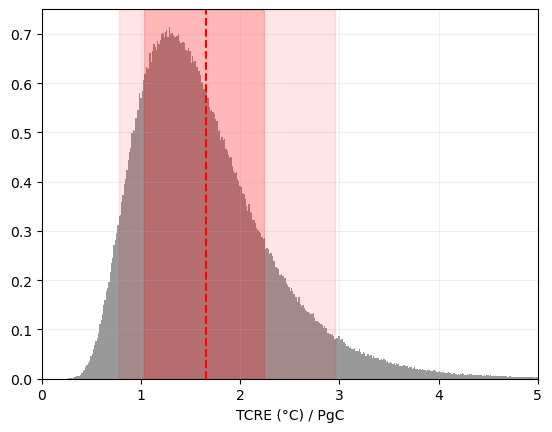

In [11]:
fig, ax = plt.subplots()

# Step 6.1: Plot
ax.hist(
    tcre_lognormal,
    density=True,
    bins=800,
    color='grey',
    alpha=0.8
)

# Step 6.2: Shade the likely and very likely ranges
ax.axvspan(
    xmin=np.quantile(tcre_lognormal,0.17),
    xmax=np.quantile(tcre_lognormal,0.83),
    color='red',
    alpha=0.2
)
ax.axvspan(
    xmin=np.quantile(tcre_lognormal,0.05),
    xmax=np.quantile(tcre_lognormal,0.95),
    color='red',
    alpha=0.1
)

# Step 6.3: Include vertical line to indicate the mean
ax.axvline(
    1.65,
    color='red',
    linestyle='dashed'
)

# Step 6.4: Axis labelling
ax.set_xlabel(
    'TCRE (°C) / PgC'
)

# Step 6.5: Plot formatting
ax.grid(
    alpha=0.2
)
ax.set_xlim(0,5)

Step 7: Save out the figure for the SI

In [12]:
fig.savefig(
    Path(
        'figures/SI_fig1.png'
    ),
    dpi=400,
    bbox_inches='tight'
)

Step 8: Save the TCRE distribution for further assessment.

In [13]:
np.save(
    Path(
        'processed_data/201_tcre.npy'
    ),
    tcre_lognormal
)